In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, layers
from tensorflow.keras.utils import to_categorical

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
wine_data = datasets.load_wine()

In [4]:
# description of wine dataset
print(wine_data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
# df of wine data
data = pd.DataFrame(data = wine_data.data, columns = wine_data.feature_names)

data["target"] = wine_data.target

data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
20,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,0
88,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680.0,1
57,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0,0
149,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550.0,2
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0,0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
data.isna().sum()  # no na values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [8]:
data.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

D:\Anaconda_3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

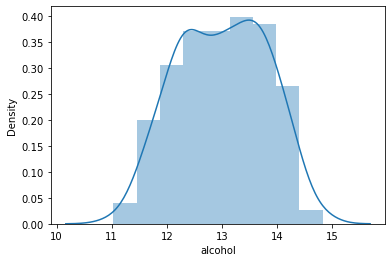

In [9]:
# find alcohol distro across wine in data
sns.distplot(data["alcohol"], kde = 1)

D:\Anaconda_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


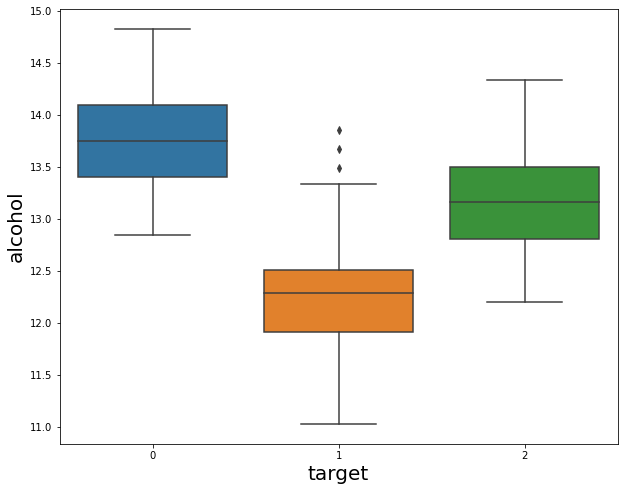

In [10]:
# alcohol content variation based on diff cat of wine
plt.figure(figsize = (10, 8))

sns.boxplot("target", "alcohol", data = data)

plt.xlabel("target", fontsize = 20)
plt.ylabel("alcohol", fontsize = 20)
plt.show()

In [11]:
features = data.drop("target", axis = 1)

target = data[["target"]]

In [12]:
features.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [13]:
# since multi class best to one hot encode target
target = to_categorical(target, 3)

target

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [15]:
standradScaler = StandardScaler()

processed_features = pd.DataFrame(standradScaler.fit_transform(features),
                                 columns = features.columns,
                                 index = features.index)

processed_features.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.841418e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,2.444986e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.059175e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.110417e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-2.494883e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-1.955365e-16,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.443133e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-4.178929e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.540590e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-4.129032e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


In [16]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, target,
                                                   test_size = 0.2, random_state = 1)

In [17]:
class WineClassificationModel(Model):   # class inherits from tf.keras model class
    
    def __init__(self, input_shape):
        super(WineClassificationModel, self).__init__()  # calls superclass(Model) init func
        
        self.d1 = layers.Dense(128, activation = "relu", input_shape = [input_shape])
        self.d2 = layers.Dense(64, activation = "relu")
        self.d3 = layers.Dense(3, activation = "softmax")
        
    def call(self, x):  # called in forward pass of this model
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        
        return x

In [21]:
model = WineClassificationModel(x_train.shape[1])

model.compile(optimizer = keras.optimizers.SGD(lr=0.001),
             loss = keras.losses.CategoricalCrossentropy(),  # used for multi class clf where target is 1-hot encoded
             metrics = ["accuracy"])

In [22]:
num_epochs = 500

In [26]:
training_history = model.fit(x_train.values,
                            y_train,
                            validation_split = 0.2,
                            epochs = num_epochs, batch_size = 40)

Epoch 1/500
3/3 [==============================] - 1s 317ms/step - loss: 1.1880 - accuracy: 0.3009 - val_loss: 1.1035 - val_accuracy: 0.4483
Epoch 2/500
3/3 [==============================] - 0s 23ms/step - loss: 1.1827 - accuracy: 0.3186 - val_loss: 1.0998 - val_accuracy: 0.4483
Epoch 3/500
3/3 [==============================] - 0s 25ms/step - loss: 1.1774 - accuracy: 0.3274 - val_loss: 1.0962 - val_accuracy: 0.4828
Epoch 4/500
3/3 [==============================] - 0s 35ms/step - loss: 1.1722 - accuracy: 0.3363 - val_loss: 1.0926 - val_accuracy: 0.4828
Epoch 5/500
3/3 [==============================] - 0s 22ms/step - loss: 1.1671 - accuracy: 0.3451 - val_loss: 1.0890 - val_accuracy: 0.4828
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 1.1620 - accuracy: 0.3628 - val_loss: 1.0855 - val_accuracy: 0.4828
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 1.1569 - accuracy: 0.3628 - val_loss: 1.0820 - val_accuracy: 0.4828
Epoch 8/500
3/3 [==

In [29]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

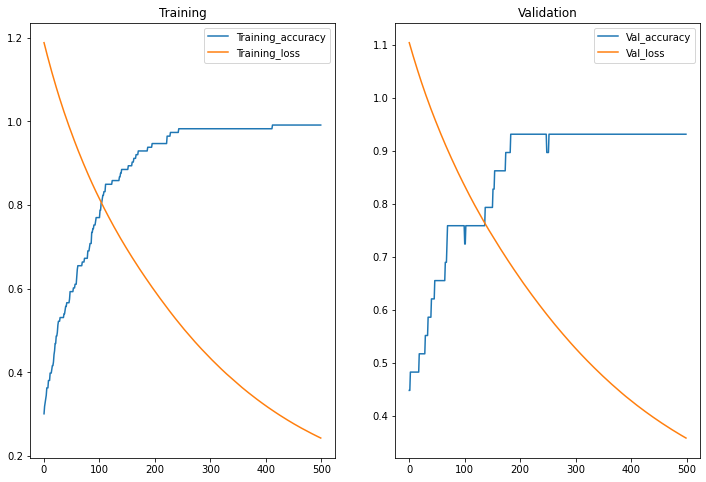

In [30]:
# data viz models performance
train_acc = training_history.history["accuracy"]
train_loss = training_history.history["loss"]

val_accuracy = training_history.history["val_accuracy"]
val_loss = training_history.history["val_loss"]

epochs_range = range(num_epochs)

plt.figure(figsize = (12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label = "Training_accuracy")
plt.plot(epochs_range, train_loss, label = "Training_loss")
plt.title("Training")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_accuracy, label = "Val_accuracy")
plt.plot(epochs_range, val_loss, label = "Val_loss")
plt.title("Validation")
plt.legend()

In [31]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)

score_df


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2/2 [==============================] - 0s 3ms/step - loss: 0.2595 - accuracy: 1.0000


loss        0.259484
accuracy    1.000000
dtype: float64

In [32]:
y_pred= model.predict(x_test)

y_pred[:10]

array([[0.08741565, 0.14103533, 0.771549  ],
       [0.06578873, 0.84622484, 0.08798647],
       [0.8674558 , 0.07938324, 0.05316102],
       [0.22810829, 0.6667813 , 0.10511046],
       [0.9095743 , 0.03882081, 0.05160495],
       [0.05864574, 0.211412  , 0.7299423 ],
       [0.09462708, 0.6719469 , 0.233426  ],
       [0.9846379 , 0.00758355, 0.00777857],
       [0.0630502 , 0.13241817, 0.8045316 ],
       [0.05568752, 0.7302831 , 0.21402933]], dtype=float32)

In [33]:
# implementing thresholding on score i.e score < 0.5 = 0 and > 0.5 = 1
y_pred = np.where(y_pred <0.5, 0, y_pred)

y_pred = np.where(y_pred >=0.5, 1, y_pred)

In [35]:
y_pred[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [37]:
y_test[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [38]:
accuracy_score(y_test, y_pred)

0.9166666666666666